<a href="https://colab.research.google.com/github/JuniorSteve770/PYTHON/blob/main/RSI_Trading_Stragtegy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# Resume of our Project
```
Tthe study shows that using an RSI-based strategy to trade Apple stock could have resulted in a profitable outcome for the year 2021.
Despite periods of significant 12% drawdown vs 17% profit, The strategy would have involved entering positions when the stock was potentially oversold and exiting when it was potentially overbought, leading to a 5% gain over the analyzed period.

In [5]:
# Import Library
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ta
import warnings
warnings.filterwarnings('ignore')

# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib as mpl
from matplotlib import cycler

colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')

In [6]:

# Download historical data for a specific ticker symbol
data = yf.download("AAPL", start='2020-01-01', end='2023-01-01')

data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249023,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536896,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114891,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941635,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


In [7]:
#compute the RSI indicator
data["rsi"] = ta.momentum.RSIIndicator(data["Adj Close"], window =14).rsi()

data

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249023,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536896,146322800,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114891,118387200,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941635,132079200,NaN
...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,35.694655
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,33.675330
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,29.726643


<Figure size 1500x600 with 0 Axes>

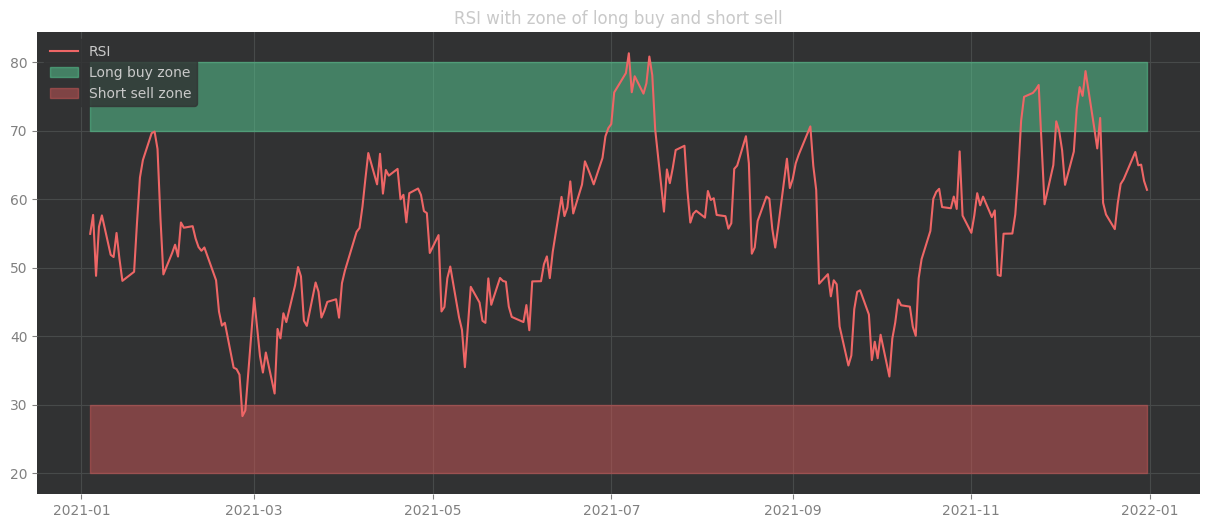

In [8]:
# Plot the RSI with the Long buy zone and Short sell zone
plt.figure(figsize=(15,6))

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# View the RSI
plt.plot(data["rsi"].loc["2021"]);
# View horizontal line for the Overbuy threshold (RSI=70)
plt.fill_between(data["rsi"].loc["2021"].index, 70, 80,
                 where=(data["rsi"].loc["2021"]) ,
                 color="#57CE95", alpha=0.5)

# View horizontal line for the Oversell threshold (RSI=30)
plt.fill_between(data["rsi"].loc["2021"].index, 20, 30,
                 where=(data["rsi"].loc["2021"] ),
                 color="#CE5757", alpha=0.5)
# Put a title
plt.title("RSI with zone of long buy and short sell")

# Put a legend
plt.legend(["RSI", "Long buy zone", "Short sell zone"])

# Show the graph
plt.show();

In [10]:
# We define when the strategy must take a long buy or a short sell

# We need define the Open Long signal and Close Long signal

# We put threshold
overbuy = 80
neutral_buy = 55

# Put nan values for the signal long columns
data["signal_long"] = np.nan
data["yesterday_rsi"] = data["rsi"].shift(1)

# We need define the Open Long signal (RSI yesterday<55 and RSI today>55)
data.loc[((data["rsi"]>neutral_buy) & (data["yesterday_rsi"]<=neutral_buy)), "signal_long"] = 1

# We need define the Close Long signal (RSI yesterday>55 and RSI today<55) False
data.loc[((data["rsi"]<=neutral_buy)&(data["yesterday_rsi"]>neutral_buy)), "signal_long"] = 0

# We need define the Close Long signal (RSI yesterday>70 and RSI today<70) Over
data.loc[((data["rsi"]<overbuy)&(data["yesterday_rsi"]>overbuy)), "signal_long"] = 0



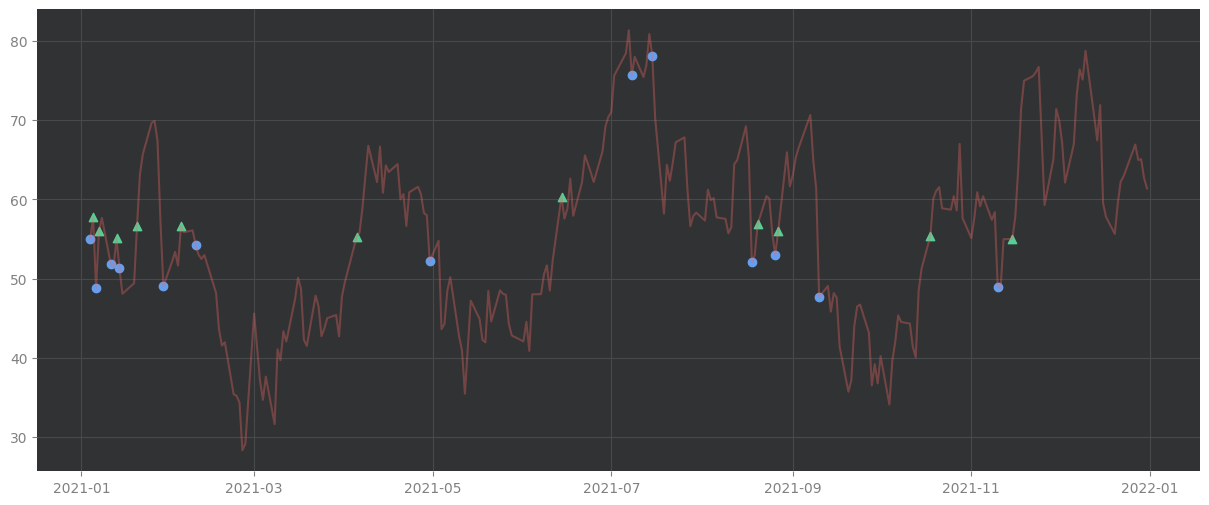

In [11]:
#here we plot all the Signals

# Select all signal in a index list to plot only this points
idx_open = data.loc[(data["signal_long"]==1)].loc["2021"].index
idx_close = data.loc[(data["signal_long"]==0)].loc["2021"].index

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green
plt.scatter(data.loc[idx_open]["rsi"].index, data.loc[idx_open]["rsi"].loc["2021"], color="#57CE95", marker ="^")

# Plot the points of the close long signal in blue
plt.scatter(data.loc[idx_close]["rsi"].index, data.loc[idx_close]["rsi"].loc["2021"], color="#669FEE", marker ="o")

# Plot the rsi to be sure that the conditions are completed
plt.plot(data["rsi"].loc["2021"].index, data["rsi"].loc["2021"], alpha=0.35)

# Show the graph
plt.show()

In [15]:
# We define when the strategy must take a long buy or a short sell

# We need define the Open Long signal and Close Long signal

# We put threshold
oversell = 30
neutral_buy = 45

# Put nan values for the signal long columns
data["signal_short"] = np.nan
data["yesterday_rsi"] = data["rsi"].shift(1)

# We need define the Open Long signal (RSI yesterday<55 and RSI today>55)
data.loc[((data["rsi"]<neutral_buy) & (data["yesterday_rsi"]>neutral_buy)), "signal_short"] = -1 #est le seul changement

# We need define the Close Long signal (RSI yesterday>55 and RSI today<55) False
data.loc[((data["rsi"]>neutral_buy)&(data["yesterday_rsi"]<neutral_buy)), "signal_short"] = 0

# We need define the Close Long signal (RSI yesterday>70 and RSI today<70) Over
data.loc[((data["rsi"]>oversell)&(data["yesterday_rsi"]<oversell)), "signal_short"] = 0



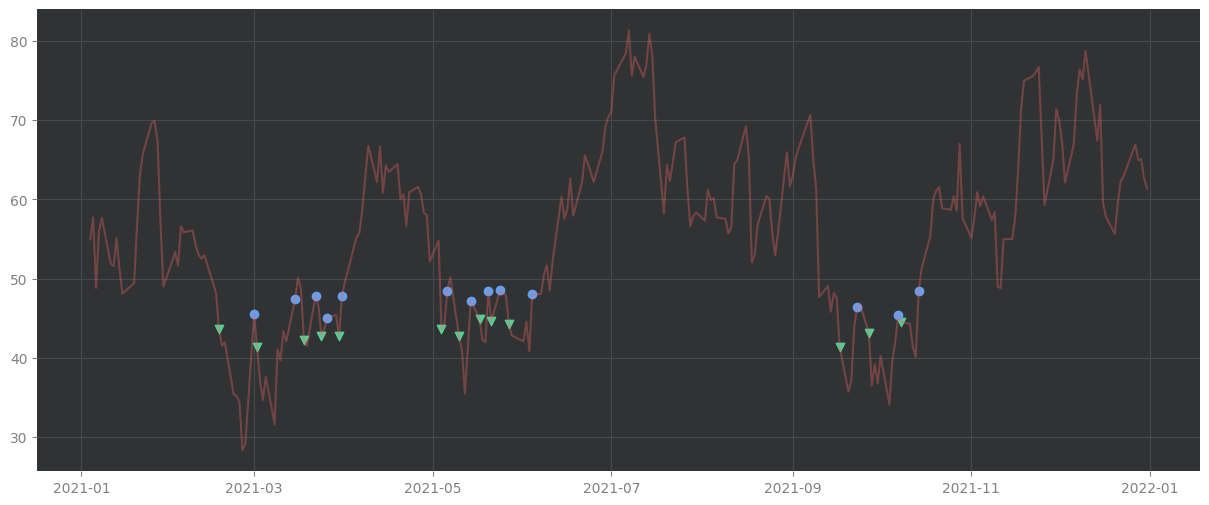

In [16]:
#here we plot all the Signals

# Select all signal in a index list to plot only this points
idx_open = data.loc[(data["signal_short"]==-1)].loc["2021"].index
idx_close = data.loc[(data["signal_short"]==0)].loc["2021"].index

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green
plt.scatter(data.loc[idx_open]["rsi"].index, data.loc[idx_open]["rsi"].loc["2021"], color="#57CE95", marker ="v")

# Plot the points of the close long signal in blue
plt.scatter(data.loc[idx_close]["rsi"].index, data.loc[idx_close]["rsi"].loc["2021"], color="#669FEE", marker ="o")

# Plot the rsi to be sure that the conditions are completed
plt.plot(data["rsi"].loc["2021"].index, data["rsi"].loc["2021"], alpha=0.35)

# Show the graph
plt.show()

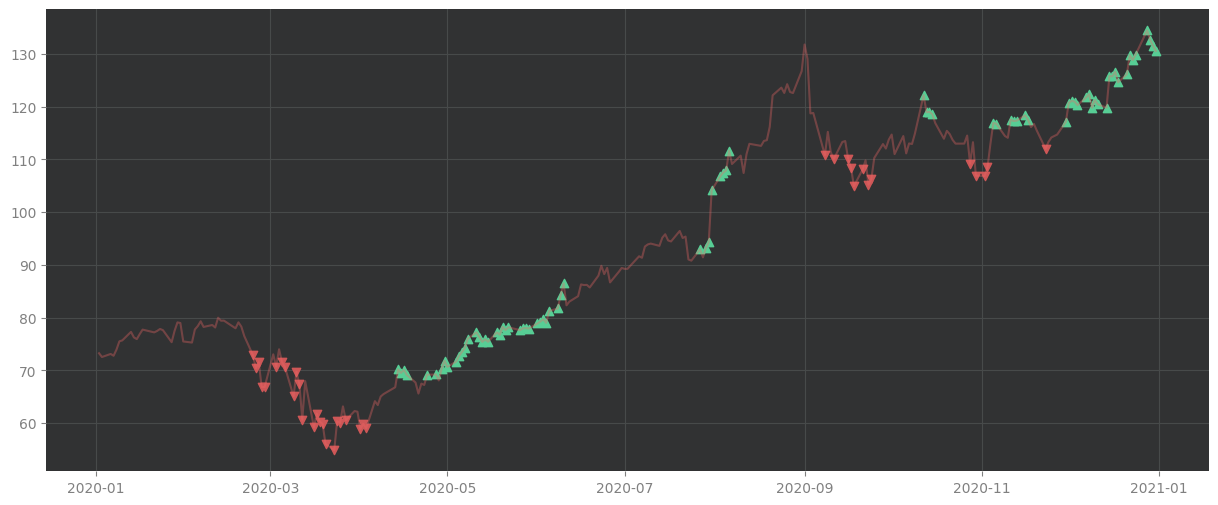

In [17]:
data["Position"] = (data["signal_short"].fillna(method="ffill") + data["signal_long"].fillna(method="ffill"))

# We plot all the signal to be sure that they be correct
year = "2021"
idx_long = data.loc[data["Position"]==1].loc[year].index
idx_short = data.loc[data["Position"]==-1].loc[year].index

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the short signal in red
plt.scatter(data.loc[idx_short]["Adj Close"].index, data.loc[idx_short]["Adj Close"].loc[year], color="#CE5757", marker="v")

# Plot the points of the long signal in green
plt.scatter(data.loc[idx_long]["Adj Close"].index, data.loc[idx_long]["Adj Close"].loc[year], color="#57CE95", marker="^")

# Plot the rsi to be sure that the conditions are completed
plt.plot(data["Adj Close"].loc[year].index, data["Adj Close"].loc[year], alpha=0.35)

# Show the graph
plt.show()
#the Graph below shows all our buy and sell position for the year 2020

new

In [28]:
def drawdown_function(serie):
    # We compute Cumsum of the returns
    cum = serie.dropna().cumsum() + 1

    # We compute max of the cumsum on the period (accumulate max)
    running_max = np.maximum.accumulate(cum)

    # We compute drawdown
    drawdown = cum / running_max - 1
    return drawdown

# (1,3,1,1,1,7, 1,1,1) -> (1,3,3,3,3,3,7,7,7)

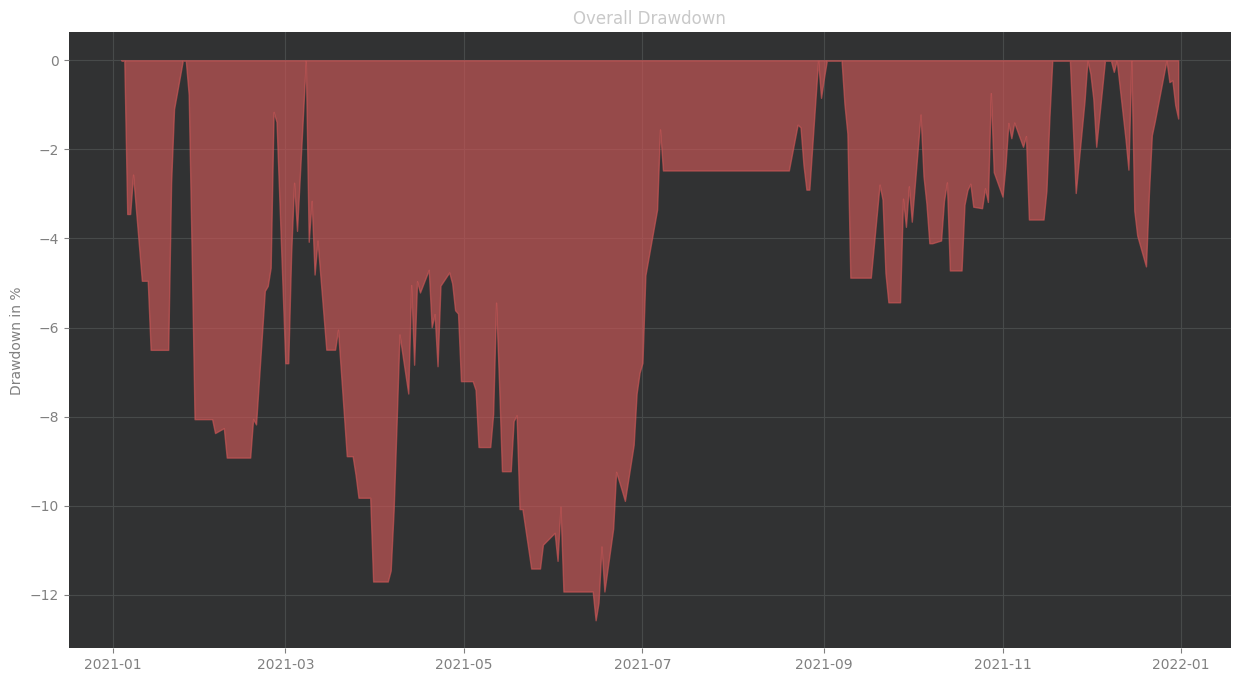

In [29]:

return_serie = data["return"].loc["2021"]

# We compute drawdown
drawdown = drawdown_function(return_serie)

# Adapt figure size
plt.figure(figsize=(15,8))

# Plot the drawdown
plt.fill_between(drawdown.index, drawdown*100, 0, color="#CE5757", alpha=0.65)

# Put a title
plt.title("Overall Drawdown")

# Put y label
plt.ylabel("Drawdown in %")

plt.show()

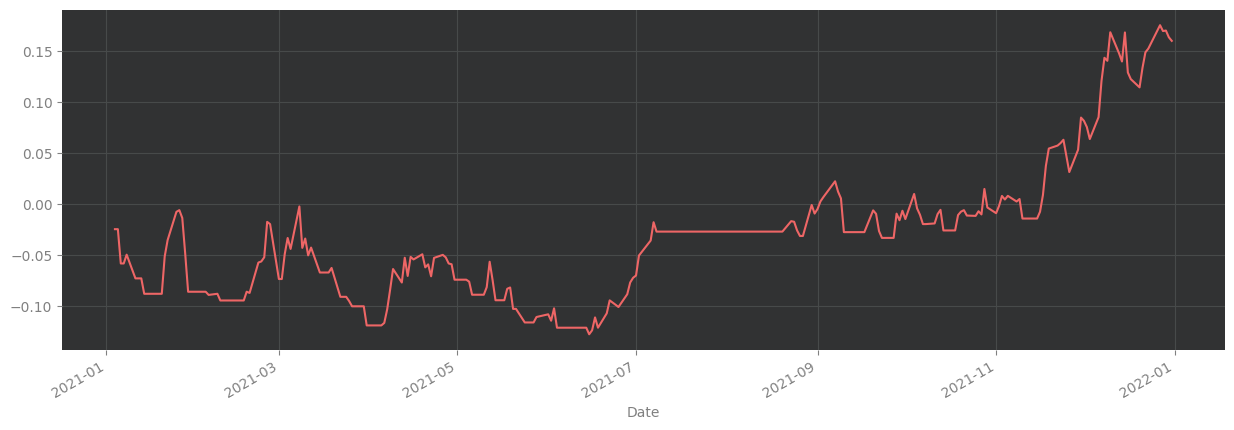

In [30]:
# Compute the overal profit

#compute  the percentage of variation of the asset
data["pct"] = data["Adj Close"].pct_change()

# Compute the return of the strategy
data["return"] = data["pct"]*(data["Position"].shift(1))

data["return"].loc["2021"].cumsum().plot(figsize=(15,5));

# (1,2,3) --> (1,3,6)

**Resume of Our Study**

* The stock price of Apple is plotted, showing significant fluctuation throughout the year with a general uptrend.

1.   Description of Buy and Sell Positions
2.   Drawdown Progression
3.   Return Curve (Overall Profits)

```
# 01: Description of Buy and Sell Positions Based on RSI Levels(Zones):
```
The top graph shows buy Positions (green Area) and sell positions (red Area) positions based on an RSI strategy where buys are made when the RSI is below 20-30% (indicating potential underbuying) and sells are made when the RSI is above 70-80% (indicating potential overbuying).

```
# 02: Description of Drawdown Progression
```
The drawdown over time, which is a measure of decline from a historical peak in trading. In this case, the graph shows periods(from january to July) where the value of the Apple Stock has fallen substantially,(12%DDW) indicated by the depths of the troughs in red.

```
# 03: Description of Return Curve (Overall Profits Progression)
```
Overall Profits Including Drawdowns: The bottom graph shows the overall profitability of the trading strategy after accounting for drawdowns. It shows a period of loss before moving into profit towards the end of the displayed time frame.

The key metrics given at the end of the image include a maximum drawdown of -12 and a maximum profit of +17, with an overall gain of 5%. This indicates that while the trading strategy experienced a significant drawdown, it ultimately yielded a profitable return.
